In [1]:
import numpy as np
import matplotlib.pyplot as plt
import json
import os
plt.rcParams["figure.figsize"] = (25,10)

plt.rcParams.update({'font.size': 22})

colors='bgrykcm'
symbol='*-+^'

In [2]:
import utils
import utils_exponential_grid
from utils_exponential_grid import predictor_corrector_radial_shcrodinger_integrator_exponential_grid as integrator
from utils_exponential_grid import normlize_function_exponential_grid as normalizer


In [3]:
kwargs={'r_max':20.0, 'grid_points':3000,'delta':0.00065,  
        'l':1, 'Z':1.0, 'E':-0.5}

#if the wave functions explode while r-> 0.0 decrease the delta parameter and or the number of grid_points  

Energy_kwargs={'r_max':0.6, 'grid_points':30,'delta':0.001}

In [4]:
exp_grid= utils_exponential_grid.get_exponential_grid_reverse(kwargs)

In [5]:
ener_grid= -1.0*np.array(utils_exponential_grid.get_exponential_grid_reverse(Energy_kwargs))

In [6]:
u_hydr= utils.U_Hydrogen(exp_grid)
u_hydr_norm= normalizer(exp_grid, u_hydr)


In [7]:
#initial conditions
w10= 1.0e-8#u_hydr[0]
w20= (w10 - 1.2e-8)/(exp_grid[0] - exp_grid[1])#(u_hydr[1] - u_hydr[0])/(exp_grid[0] - exp_grid[1])

In [8]:
l_arra=[0,1,2]
nodes_positions_by_l={}
for l in l_arra:
    u0_E=[]# u_func(r=0) as function of energy
    for E in ener_grid:
        kwargs_temp=utils.copy_kwargs(kwargs)
        kwargs_temp['E']=E
        kwargs_temp['l']=l
        u_func= integrator(exp_grid, w10,w20, kwargs_temp)
        u_func_norm= normalizer(exp_grid, u_func)
        u0_E.append(u_func_norm[-1])
    number_of_nodes, nodes_positions= utils.get_nodes_information(u0_E, ener_grid)
    nodes_positions_by_l[l]=nodes_positions

In [9]:
u_functions_list=[]
E_eingevalues_list=[]
kwargs_list=[]
grid_list=[]
l_values=[]
for l in l_arra:
    for i_nodes_positions in nodes_positions_by_l[l]:
        kwargs['l']=l
        u_func, p, p_kwargs, p_grid= utils.find_eigenvalue_secant_method(i_nodes_positions, kwargs, exp_grid, integrator, normalizer,
                                                        w10, w20)
        u_functions_list.append(u_func)
        E_eingevalues_list.append(p)
        kwargs_list.append(p_kwargs)
        grid_list.append(p_grid)
        l_values.append(l)

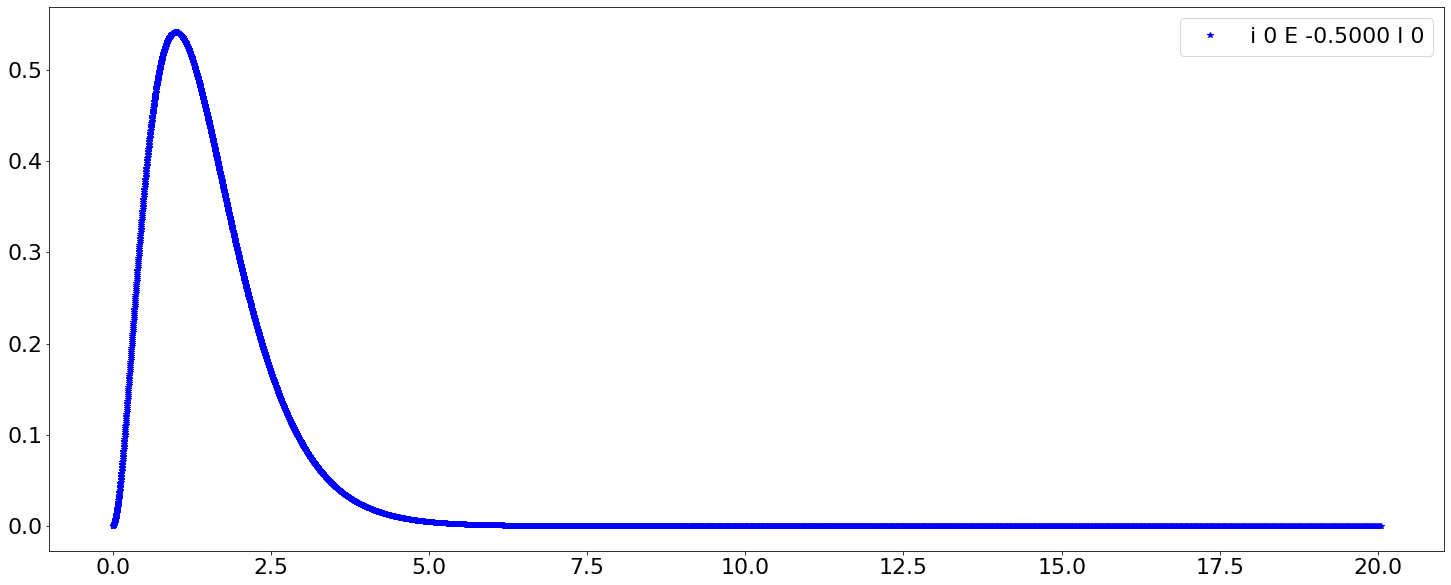

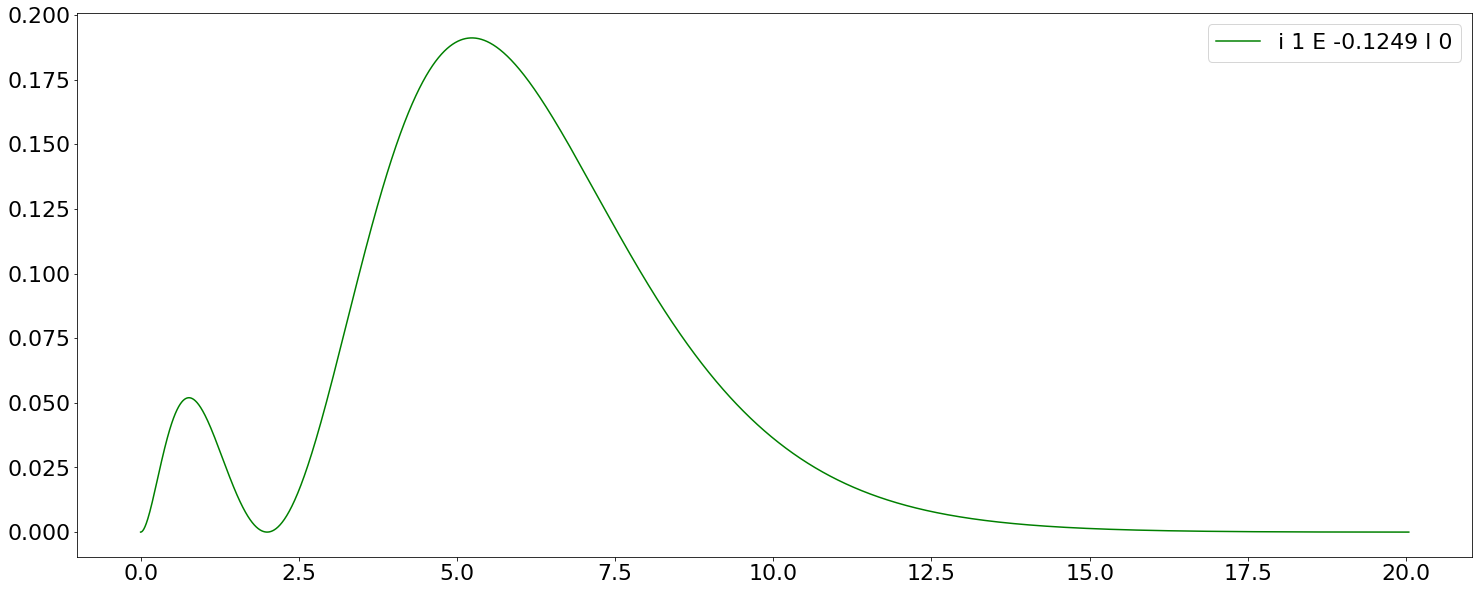

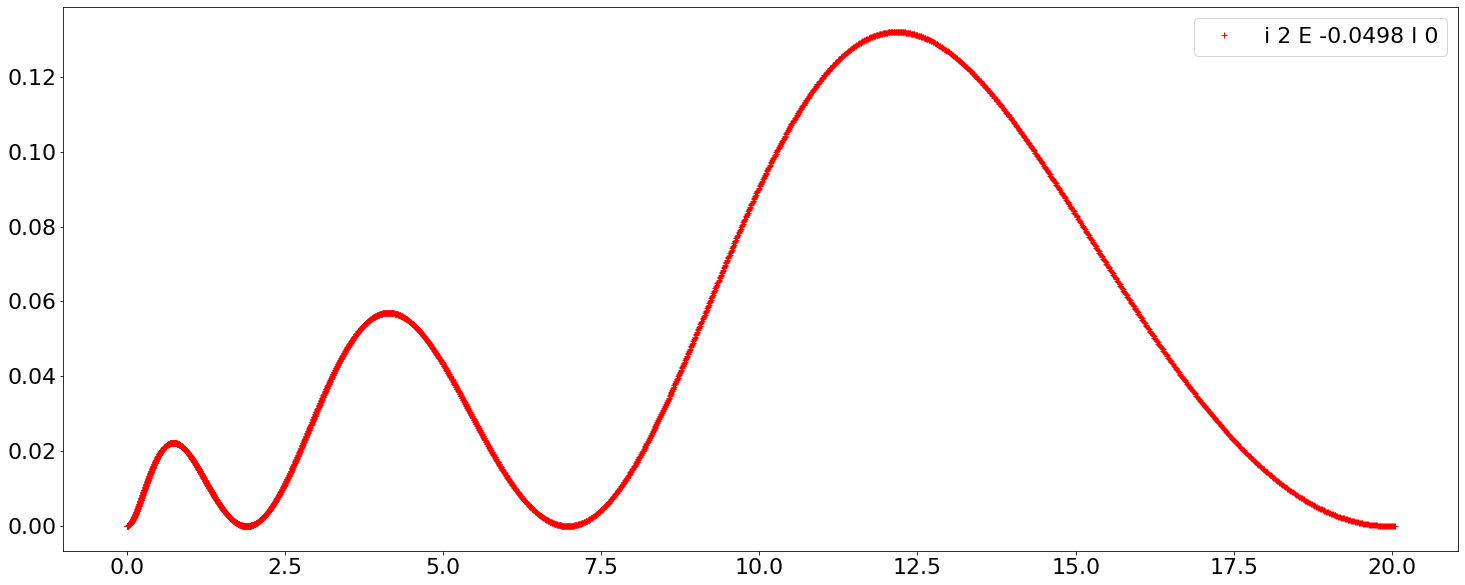

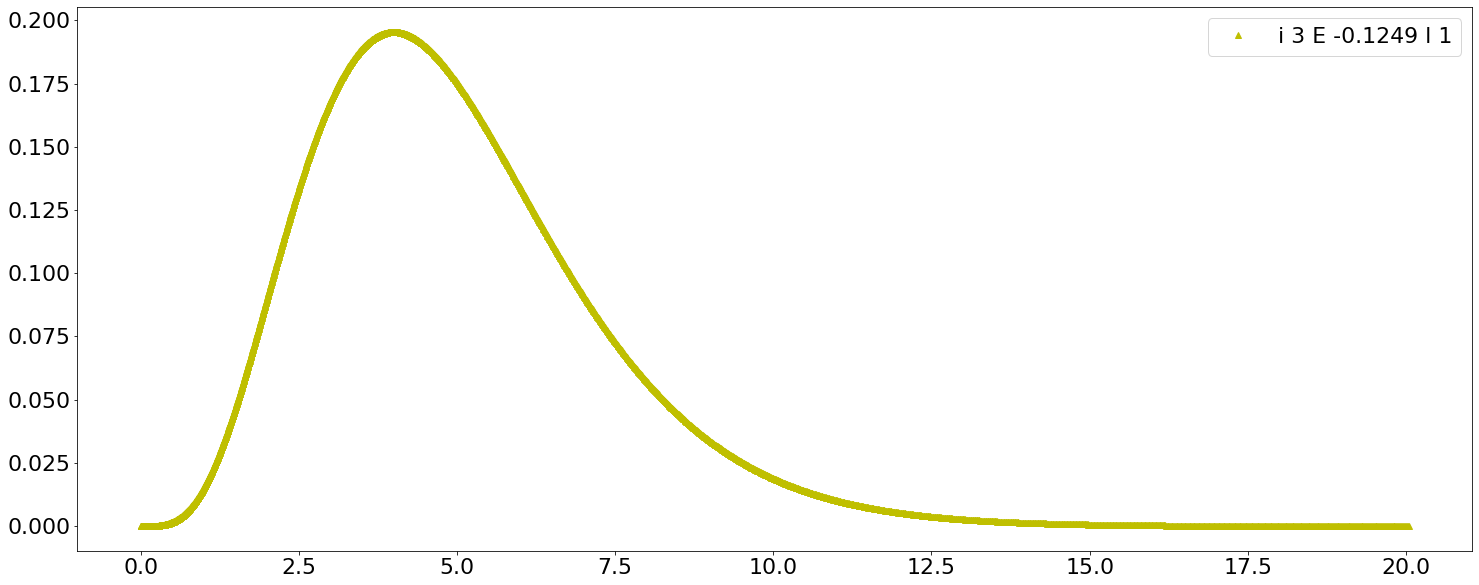

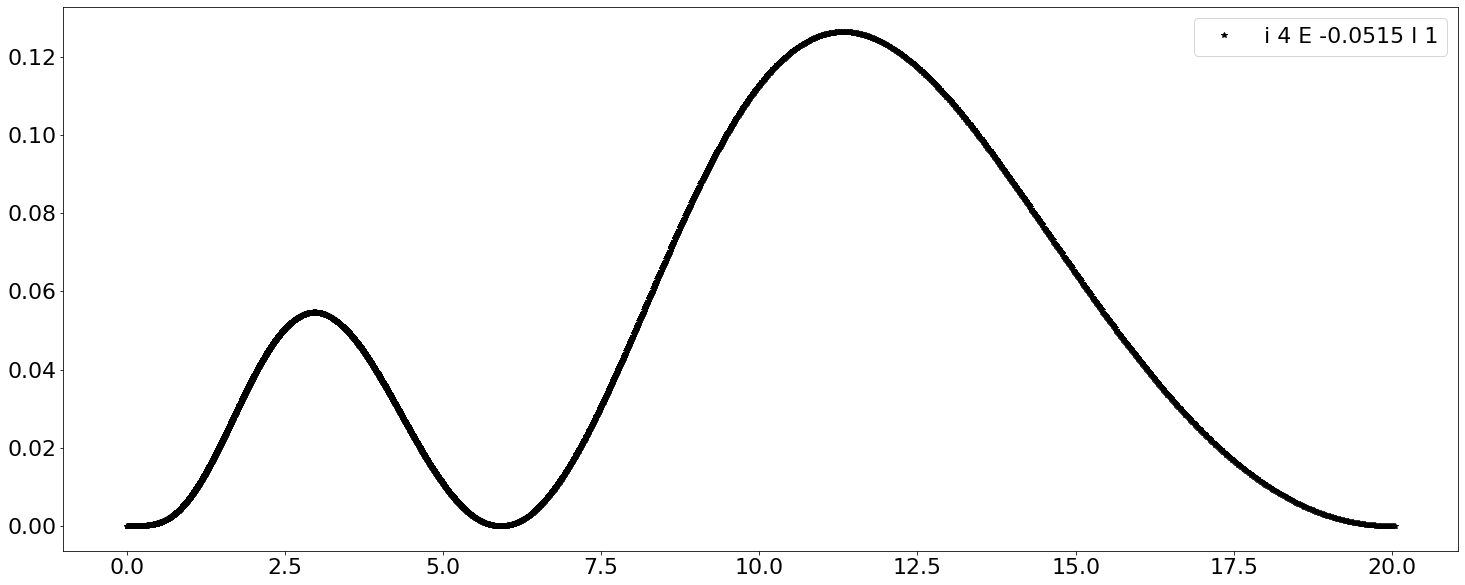

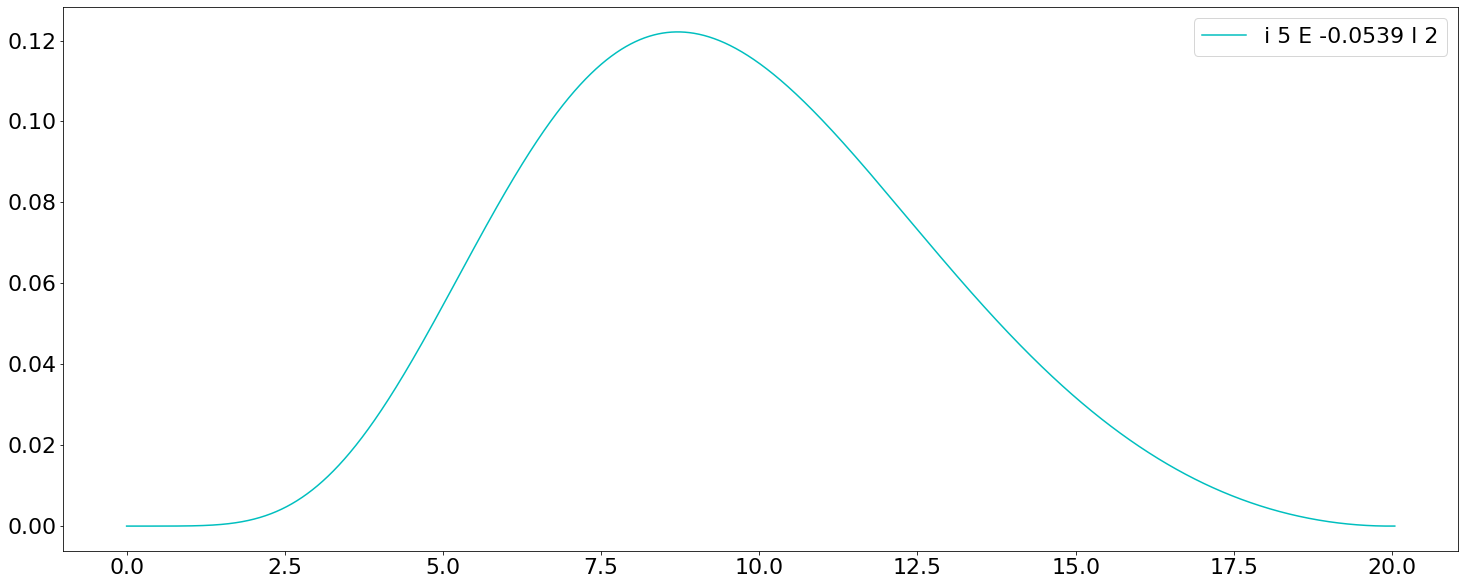

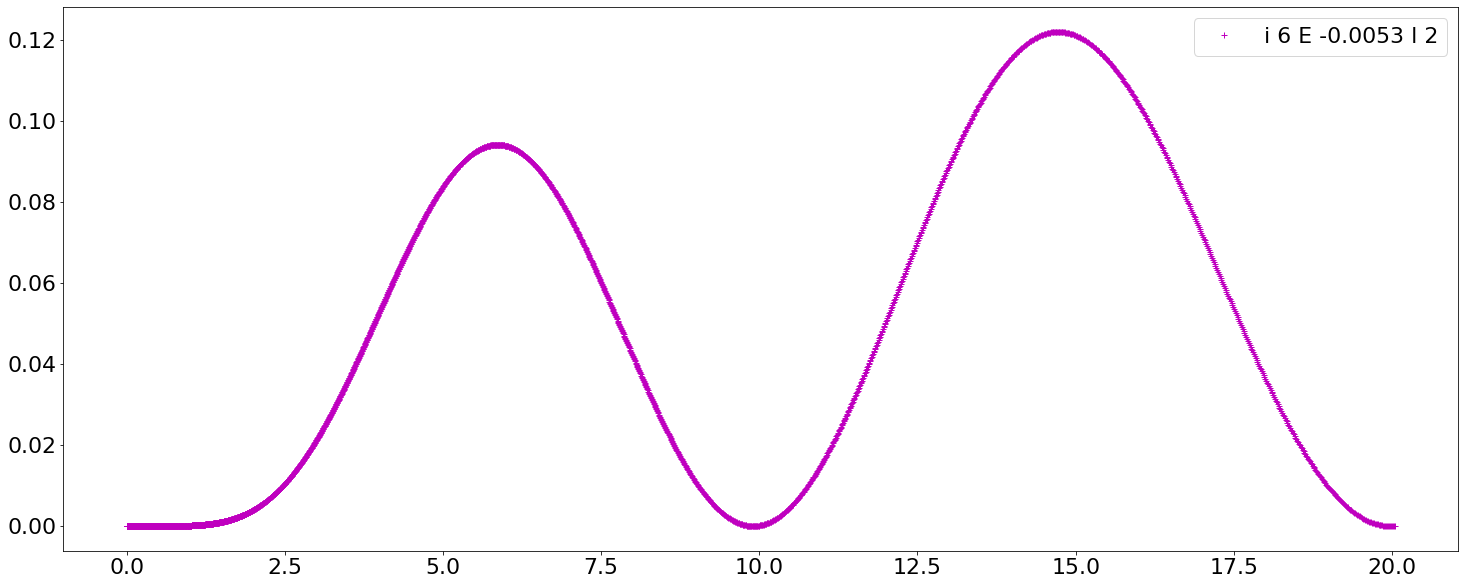

In [10]:
for i, radi_eige_func in enumerate(u_functions_list):
    colo_symb=colors[i%len(colors)]+symbol[i%len(symbol)]
    label=f'i {i} E {str(E_eingevalues_list[i])[:7]} l {str(l_values[i])}'#' Z_{radi_eige_func.Z}_l_{radi_eige_func.l}'
    plt.plot(exp_grid,np.array(radi_eige_func)**2,colo_symb,  label=label)
    plt.legend()
    plt.show()

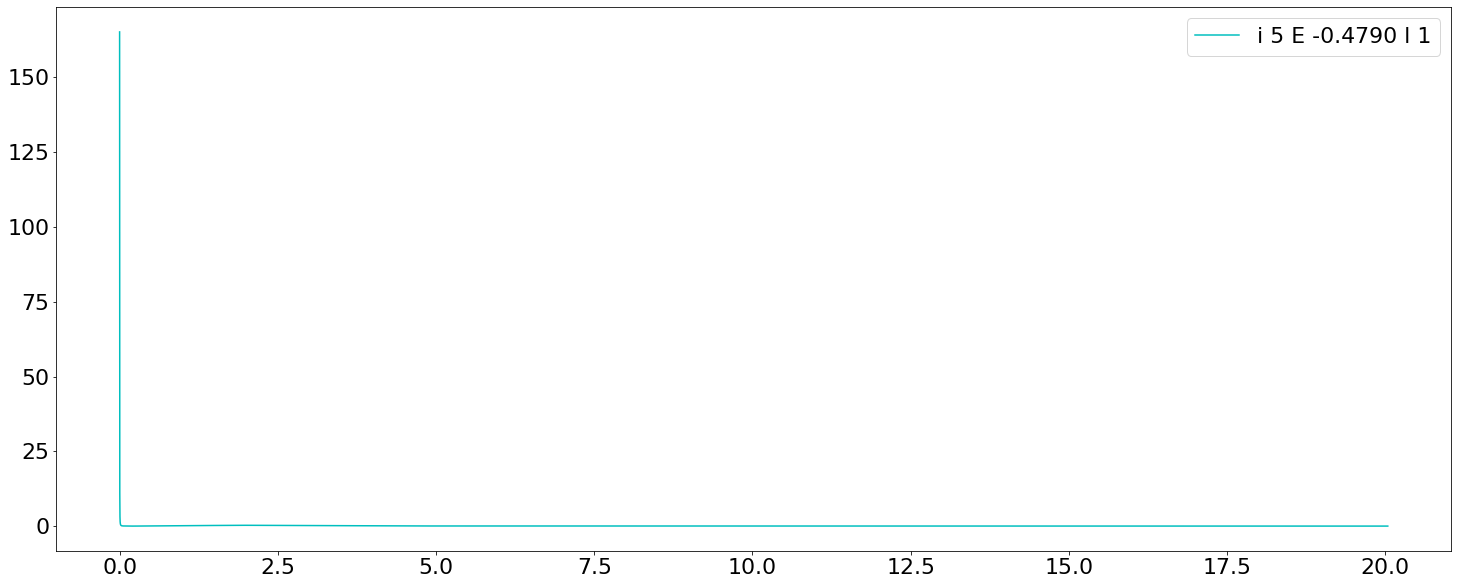

In [11]:
i=5
radi_eige_func=u_functions_list[i]
colo_symb=colors[i%len(colors)]+symbol[i%len(symbol)]
label=f'i {i} E {str(E_eingevalues_list[i])[:7]} l {str(l_values[i])}'#' Z_{radi_eige_func.Z}_l_{radi_eige_func.l}'
plt.plot(exp_grid,np.array(radi_eige_func)**2,colo_symb,  label=label)
plt.legend()
plt.show()

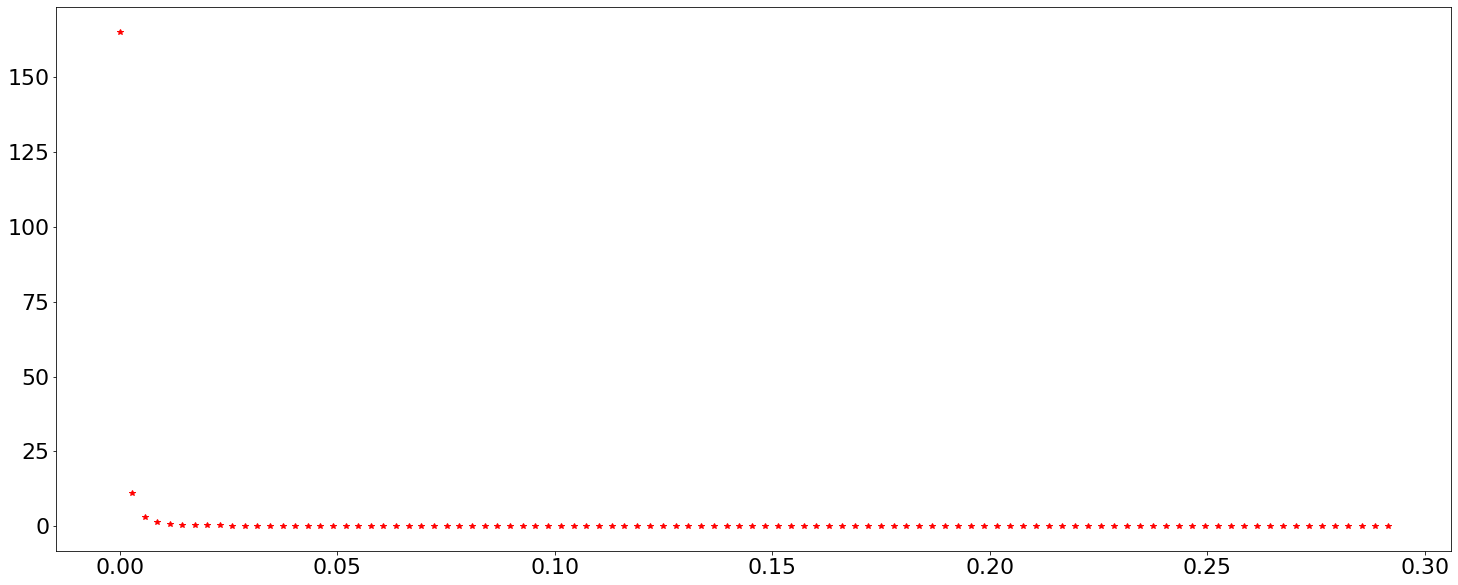

In [12]:
L=-100
plt.plot(exp_grid[L:],radi_eige_func[L:]**2.0,'r*')
plt.show()

In [13]:
exp_grid[-2:]

[0.005853001326743406, 1e-12]

In [14]:
h_arra= np.array(exp_grid[:-1]) - np.array(exp_grid[1:])

In [15]:
h_arra[-4:]

array([0.00585449, 0.005854  , 0.0058535 , 0.005853  ])

In [17]:
h_arra[:4]

array([0.00755179, 0.00755179, 0.00755179, 0.00755179])

In [ ]:
#debuging starts

In [22]:
kwargs={'r_max':10.0, 'grid_points':3000,'delta':0.0025,  
        'l':2, 'Z':1.0, 'E':-0.05418}
exp_grid= np.flip(0.01*np.array([*range(1000)]))#utils_exponential_grid.get_exponential_grid_reverse(kwargs)

def y_func(r_n):
    return np.exp(-1.0*(r_n -5.0)**2.0)

w10= y_func(exp_grid[0])#1.0e-8#u_hydr[0]
w20= (y_func(exp_grid[1]) - w10)/(exp_grid[0] - exp_grid[1])

In [23]:
u_func= integrator(exp_grid, w10,w20, kwargs)

In [24]:
y= y_func(np.array(exp_grid))

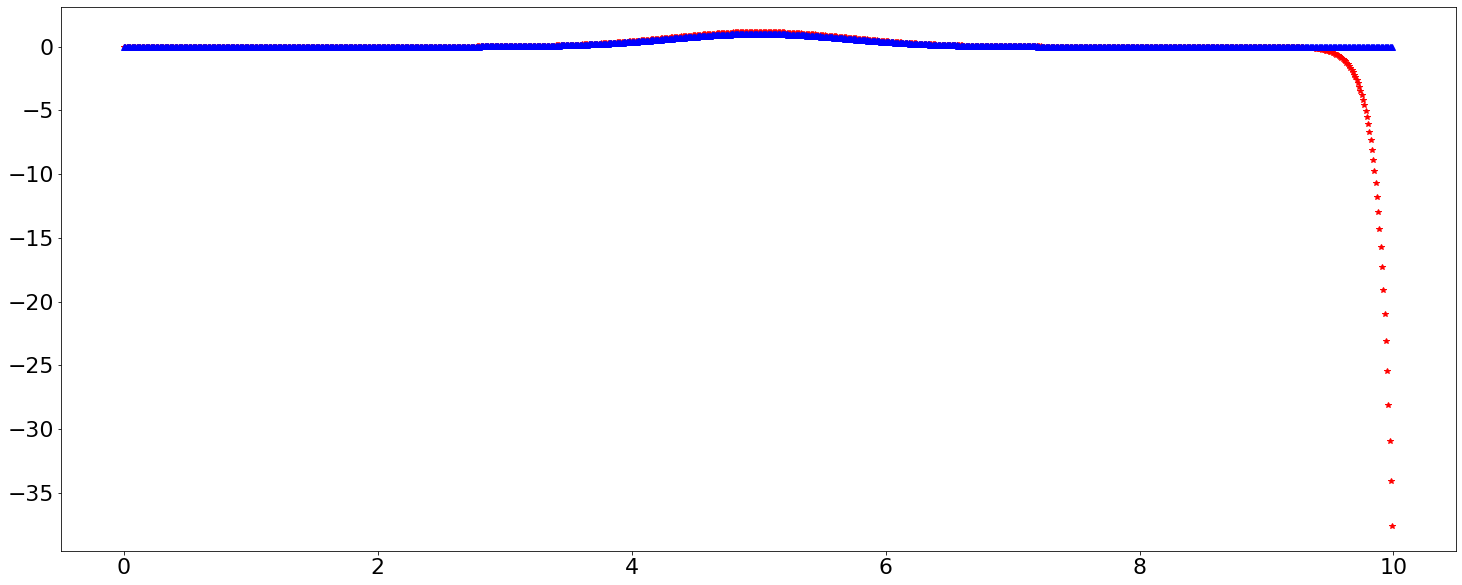

In [26]:
plt.plot(exp_grid,u_func,'r*', exp_grid,y,'b^')
plt.show()

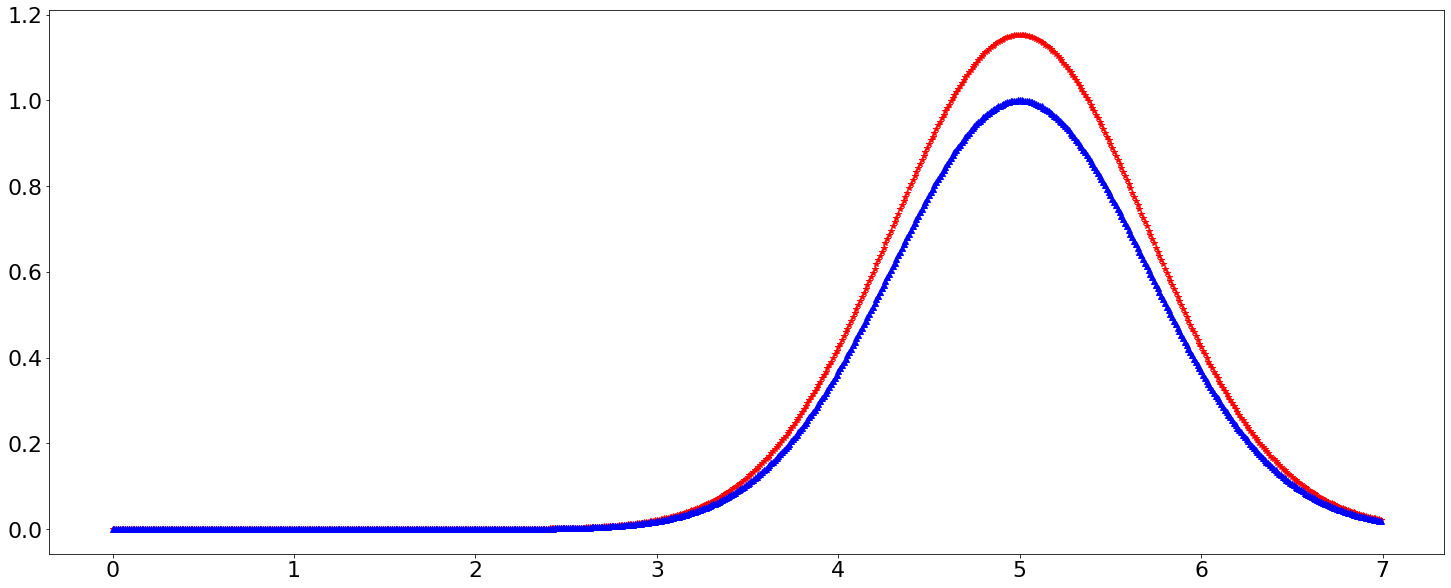

In [25]:
plt.plot(exp_grid[:700],u_func[:700],'r*', exp_grid[:700],y[:700],'b^')
plt.show()

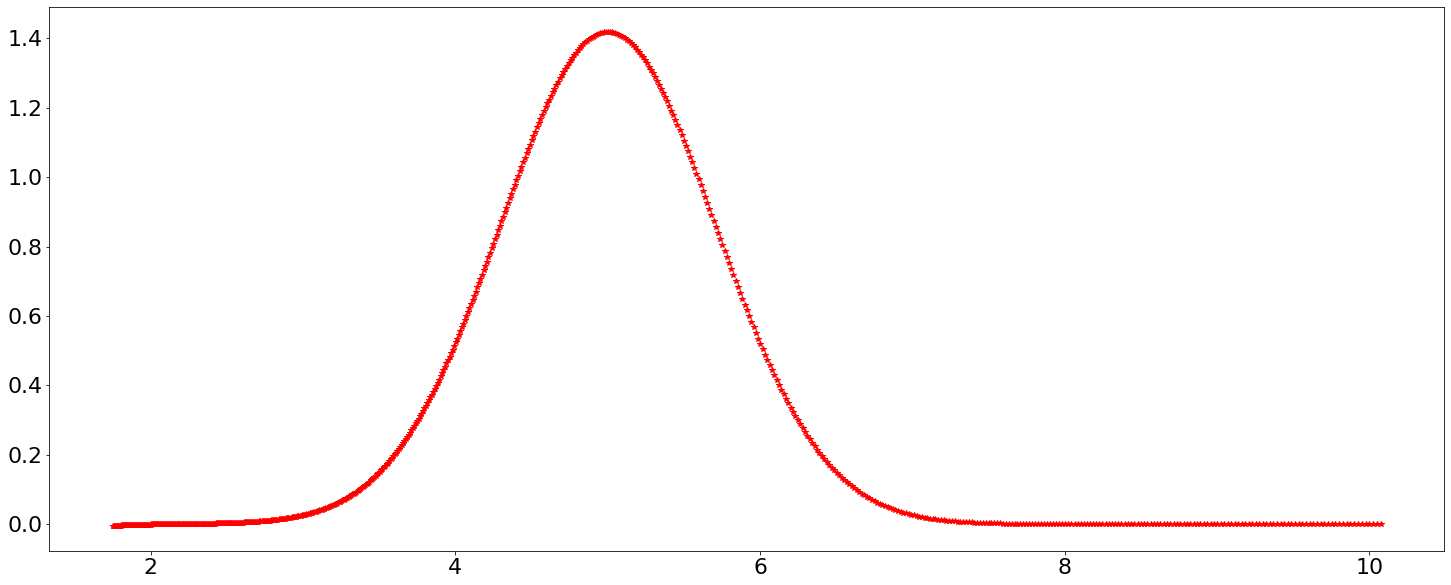

In [14]:
plt.plot(exp_grid[:700],u_func[:700],'r*')
plt.show()

In [11]:
exp_grid

[10.074698266610483,
 10.049778051581265,
 10.024857836552048,
 9.99993762152283,
 9.975017406493613,
 9.950097191464396,
 9.925239199161938,
 9.900443274223713,
 9.875709261675091,
 9.851037006928431,
 9.826426355782045,
 9.801877154419298,
 9.777389249407584,
 9.752962487697438,
 9.728596716621498,
 9.704291783893627,
 9.680047537607923,
 9.655863826237754,
 9.631740498634857,
 9.607677404028344,
 9.58367439202381,
 9.559731312602334,
 9.535848016119612,
 9.512024353304943,
 9.488260175260365,
 9.464555333459698,
 9.440909679747588,
 9.417323066338637,
 9.393795345816418,
 9.370326371132618,
 9.346915995606052,
 9.323564072921807,
 9.300270457130294,
 9.277035002646327,
 9.253857564248253,
 9.230737997076991,
 9.20767615663519,
 9.184671898786249,
 9.161725079753506,
 9.138835556119245,
 9.11600318482388,
 9.093227823165023,
 9.070509328796575,
 9.047847559727886,
 9.025242374322811,
 9.002693631298882,
 8.980201189726369,
 8.957764909027452,
 8.935384648975287,
 8.913060269693187,
 

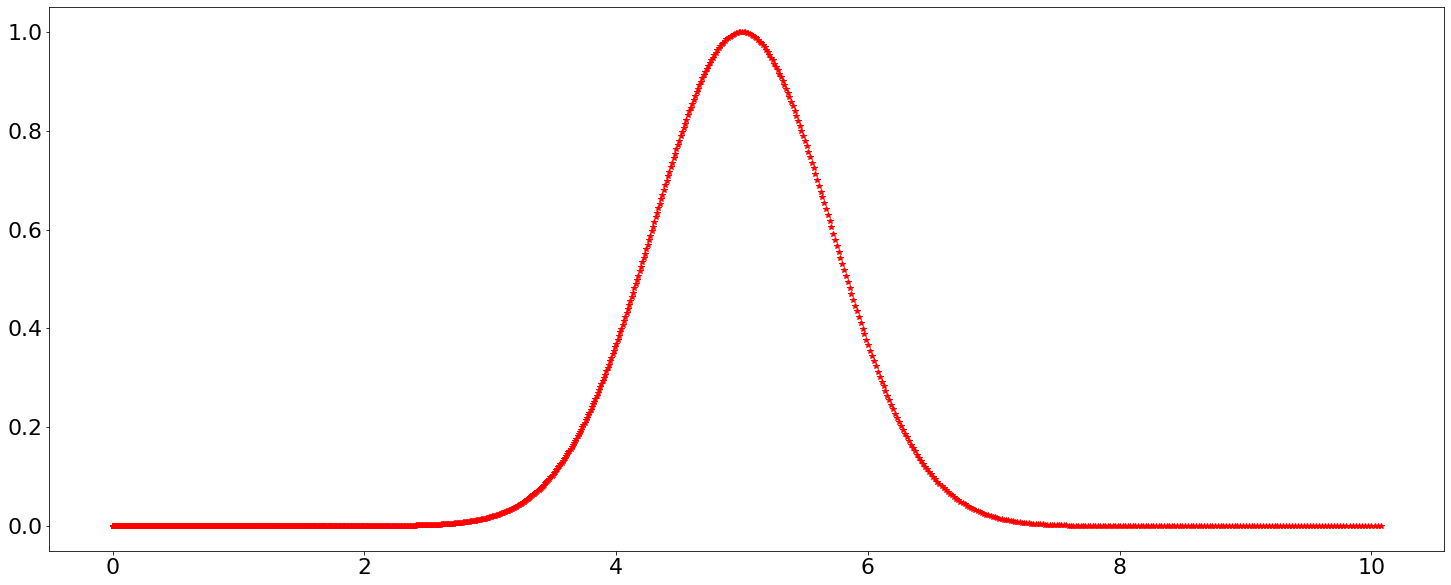

In [8]:
plt.plot(exp_grid,y,'r*')
plt.show()

In [17]:
y

array([1.80102834e+159, 2.67673735e+158, 3.99805353e+157, ...,
       2.71798025e+000, 2.71813122e+000, 2.71828183e+000])

In [17]:
E_eingevalues_list[5]

-0.05418111891895936

In [19]:
kwargs={'r_max':20.0, 'grid_points':3000,'delta':0.0025,  
        'l':2, 'Z':1.0, 'E':-0.05418}

w10= 1.0e-8#u_hydr[0]
w20= (1.2e-8 - w10)/(exp_grid[0] - exp_grid[1])

In [20]:
u_func= integrator(exp_grid, w10,w20, kwargs_temp)

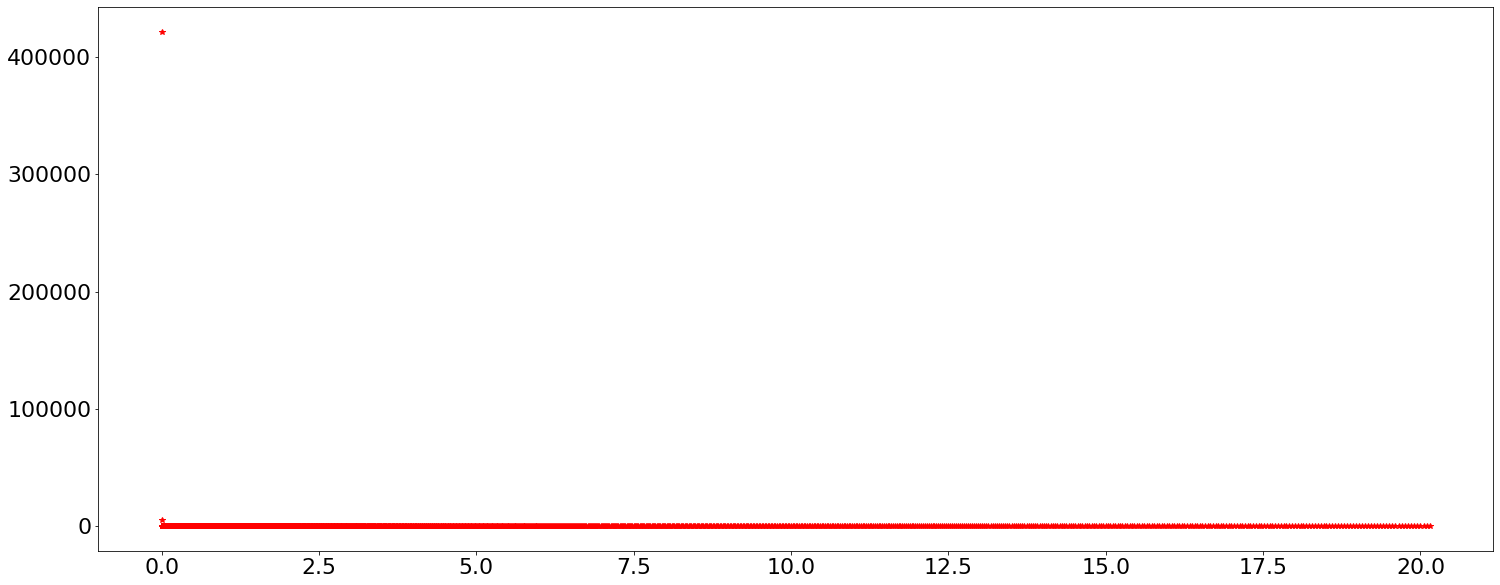

In [22]:
plt.plot(exp_grid,np.array(u_func)**2,'r*')
plt.show()

In [24]:
u_func[-10:]

[1.099358658179232,
 1.3947760985598454,
 1.8260229225600126,
 2.490657320039399,
 3.5918449552297034,
 5.610246455128072,
 9.908532807090051,
 21.575887226743177,
 71.01073616983679,
 649.2708142406959]

In [ ]:
#debuging ends

In [ ]:
#testing with known answer for hydrogen start

In [7]:
u_func= utils_exponential_grid.predictor_corrector_radial_shcrodinger_integrator_exponential_grid(exp_grid, w10,w20, kwargs)
u_func_norm= utils_exponential_grid.normlize_function_exponential_grid(exp_grid, u_func)

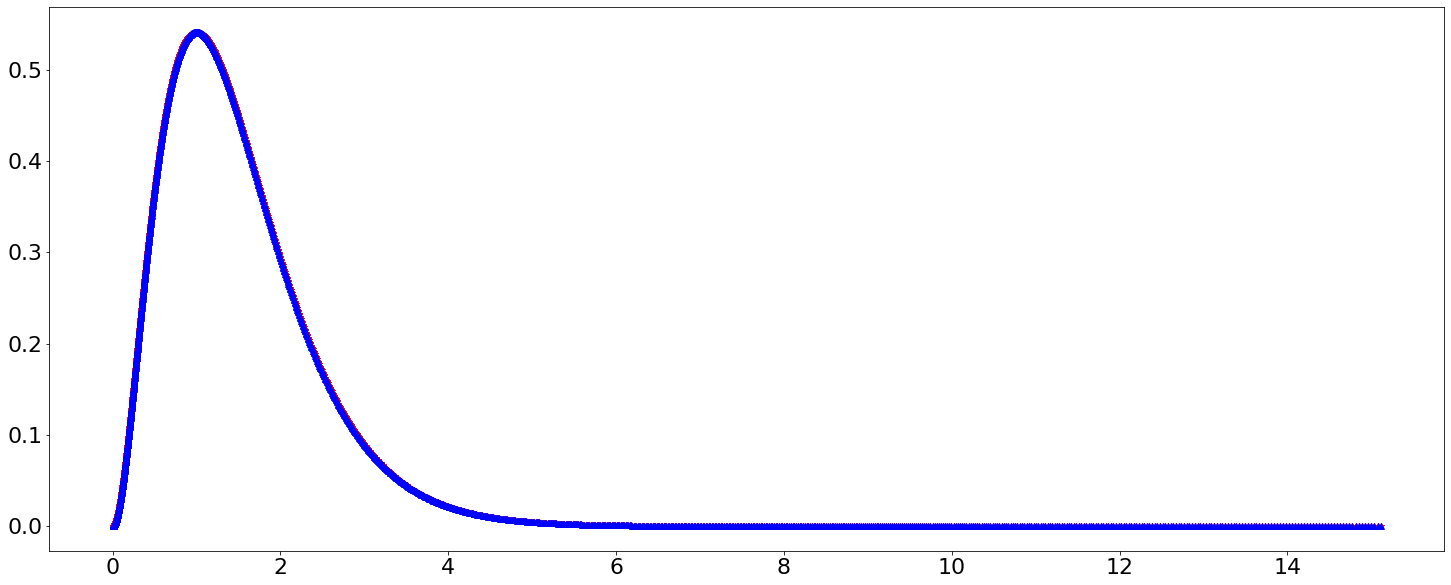

In [8]:
plt.plot(exp_grid,np.array(u_func_norm)**2,'r*', exp_grid,np.array(u_hydr_norm)**2,'b^')
plt.show()

In [ ]:
#testing with known answer for hydrogen ends